In [563]:
import pandas as pd # Library for data handling
import numpy as np # matrix operations
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb
#!pip install branca
#!pip install folium
#!pip install mapclassify

In [564]:
df = pd.read_csv('https://raw.githubusercontent.com/faisalapp/Palette_Training_5/main/rm_crop_yields_1938_2021.csv')

In [565]:
df.head() # checking

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


In [566]:
df.tail() # checking

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
25012,2017,622,NaN,43.06,59.49,NaN,NaN,NaN,93.01,NaN,43.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25013,2018,622,NaN,39.30,59.50,NaN,NaN,NaN,96.40,NaN,43.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN
25014,2019,622,NaN,46.10,63.90,NaN,NaN,NaN,106.00,NaN,33.7,73.9,NaN,NaN,NaN,NaN,NaN,NaN
25015,2020,622,NaN,40.90,55.10,NaN,NaN,NaN,94.50,NaN,49.2,74.3,NaN,NaN,NaN,NaN,NaN,NaN
25016,2021,622,NaN,23.90,17.00,NaN,NaN,NaN,25.80,NaN,NaN,23.3,NaN,NaN,NaN,NaN,NaN,NaN


In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25017 entries, 0 to 25016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25017 non-null  int64  
 1   RM            25017 non-null  int64  
 2   Winter Wheat  3037 non-null   float64
 3   Canola        14008 non-null  float64
 4   Spring Wheat  24924 non-null  float64
 5   Mustard       4487 non-null   float64
 6   Durum         11581 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          23913 non-null  float64
 9   Lentils       5515 non-null   float64
 10  Peas          8134 non-null   float64
 11  Barley        24703 non-null  float64
 12  Fall Rye      15847 non-null  float64
 13  Canary Seed   3819 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          20934 non-null  float64
 17  Chickpeas     960 non-null    float64
dtypes: float64(16), int64(2)
m

In [568]:
df.isna()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,False,False,True,True,False,True,True,True,False,True,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,True,True,False,True,True,False,True,True,True,True,False,True
2,False,False,True,True,False,True,True,True,False,True,True,False,True,True,True,True,False,True
3,False,False,True,True,False,True,True,True,False,True,True,False,True,True,True,True,False,True
4,False,False,True,True,False,True,True,True,False,True,True,False,False,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25012,False,False,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True
25013,False,False,True,False,False,True,True,True,False,True,False,False,True,True,True,True,True,True
25014,False,False,True,False,False,True,True,True,False,True,False,False,True,True,True,True,True,True
25015,False,False,True,False,False,True,True,True,False,True,False,False,True,True,True,True,True,True


In [569]:
df.isna().sum()

Year                0
RM                  0
Winter Wheat    21980
Canola          11009
Spring Wheat       93
Mustard         20530
Durum           13436
Sunflowers      24071
Oats             1104
Lentils         19502
Peas            16883
Barley            314
Fall Rye         9170
Canary Seed     21198
Spring Rye      24212
Tame Hay        20812
Flax             4083
Chickpeas       24057
dtype: int64

In [570]:
df.duplicated().sum()

0

In [571]:
#df.fillna(df.groupby(['RM']).mean())
df_new = df.groupby('RM').apply(lambda df:df.fillna(df.mean())) # fill empty value with mean yield within each RM group
# df_new.to_csv('D:/gis-data-science/Palette_training_5/df_new.csv') # checking

In [572]:
df_new

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,42.945217,21.947115,4.00,758.895,23.922286,1170.557895,1.00,902.666667,32.5,1.000000,27.195789,964.0,0.0,1.268571,0.0,NaN
1,1939,1,42.945217,21.947115,9.00,758.895,23.922286,1170.557895,16.00,902.666667,32.5,16.000000,27.195789,964.0,0.0,1.268571,0.0,NaN
2,1940,1,42.945217,21.947115,12.00,758.895,23.922286,1170.557895,23.00,902.666667,32.5,19.000000,27.195789,964.0,0.0,1.268571,8.0,NaN
3,1941,1,42.945217,21.947115,18.00,758.895,23.922286,1170.557895,32.00,902.666667,32.5,28.000000,27.195789,964.0,0.0,1.268571,5.0,NaN
4,1942,1,42.945217,21.947115,20.00,758.895,23.922286,1170.557895,35.00,902.666667,32.5,28.000000,14.000000,964.0,0.0,1.268571,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25012,2017,622,51.640000,43.060000,59.49,NaN,14.600000,0.000000,93.01,NaN,43.6,38.157568,20.975000,NaN,0.0,1.625385,5.0,NaN
25013,2018,622,51.640000,39.300000,59.50,NaN,14.600000,0.000000,96.40,NaN,43.0,54.000000,20.975000,NaN,0.0,1.625385,5.0,NaN
25014,2019,622,51.640000,46.100000,63.90,NaN,14.600000,0.000000,106.00,NaN,33.7,73.900000,20.975000,NaN,0.0,1.625385,5.0,NaN
25015,2020,622,51.640000,40.900000,55.10,NaN,14.600000,0.000000,94.50,NaN,49.2,74.300000,20.975000,NaN,0.0,1.625385,5.0,NaN


In [573]:
df_new.isna().sum() # We still have empty fields because for some RM groups, there is no yield value at all so no average

Year                0
RM                  0
Winter Wheat     1342
Canola              0
Spring Wheat        0
Mustard          2038
Durum             305
Sunflowers        239
Oats                0
Lentils          1114
Peas              107
Barley              0
Fall Rye            0
Canary Seed       765
Spring Rye        107
Tame Hay            0
Flax                0
Chickpeas       14266
dtype: int64

In [574]:
df_new = df_new.fillna(df_new.mean()) # fill rest of the NaN with mean within each column

In [575]:
# df_new.replace(0,fillna(df_new.mean())
# print(df_new)

In [576]:
df_new.isna().sum() # now we have all values populated in the data frame

Year            0
RM              0
Winter Wheat    0
Canola          0
Spring Wheat    0
Mustard         0
Durum           0
Sunflowers      0
Oats            0
Lentils         0
Peas            0
Barley          0
Fall Rye        0
Canary Seed     0
Spring Rye      0
Tame Hay        0
Flax            0
Chickpeas       0
dtype: int64

In [577]:
df_per_year = df_new.groupby('Year').sum() # sum of yield per crop per year
df_per_rm = df_new.groupby('RM').sum() # sum of yield per crop per RM

In [578]:
# df_per_year.to_csv('D:/gis-data-science/Palette_training_5/df_per_year.csv')
df_per_year.drop('RM', axis=1, inplace=True)
df_per_rm.drop('Year', axis=1, inplace=True)

In [579]:
df_per_year = df_per_year[0:].sum(axis=1).reset_index(name ='Yield_per_Year').sort_values(by='Yield_per_Year', ascending=False) # sum of all yields per Year
df_per_year.set_index('Year', inplace=True)
df_per_year # sum of all crop yield per year

,Yield_per_Year
Year,
2013,1.742612e+06
2020,1.665027e+06
2016,1.618404e+06
1999,1.609025e+06
2019,1.589959e+06
...,...
2014,1.405573e+06
2021,1.385408e+06
2003,1.369148e+06


In [580]:
df_per_rm = df_per_rm[0:].sum(axis=1).reset_index(name ='Yield_per_RM').sort_values(by='Yield_per_RM', ascending=False) # sum of all yields per RM
df_per_rm.set_index('RM', inplace=True)
df_per_rm # sum of all crop yield per RM

,Yield_per_RM
RM,
159,589340.605974
189,577326.092482
160,572427.018920
191,549604.103498
158,549146.372047
...,...
273,310239.048567
35,291375.946040
529,272134.026642


<AxesSubplot:xlabel='Year'>

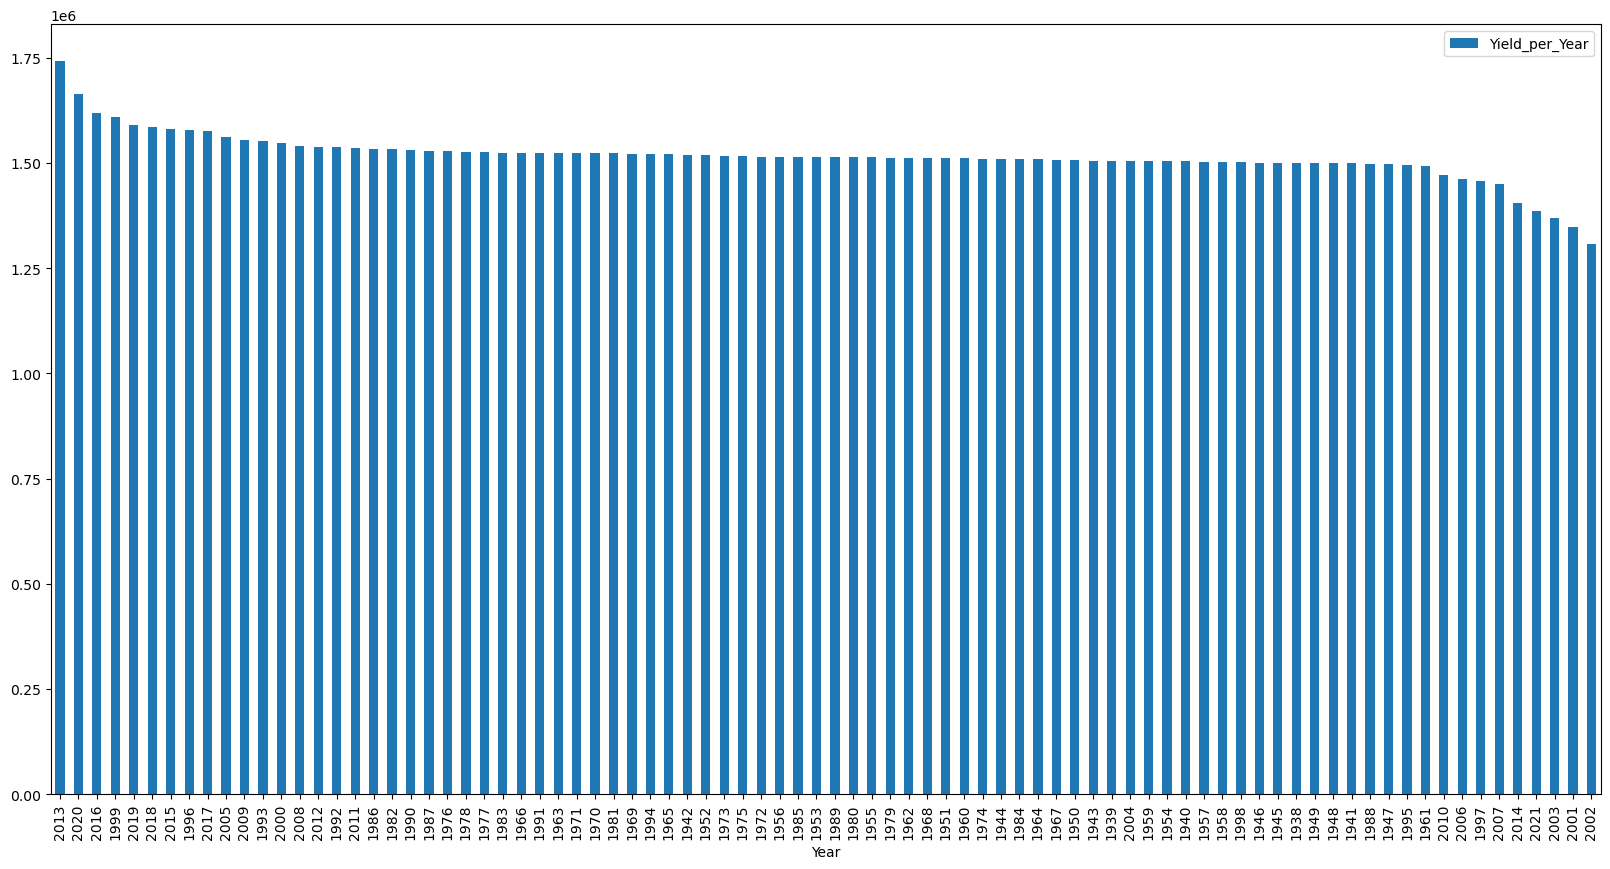

In [581]:
df_per_year.plot(kind='bar', figsize=(20, 10)) # graph showing total yield per year


<AxesSubplot:xlabel='RM'>

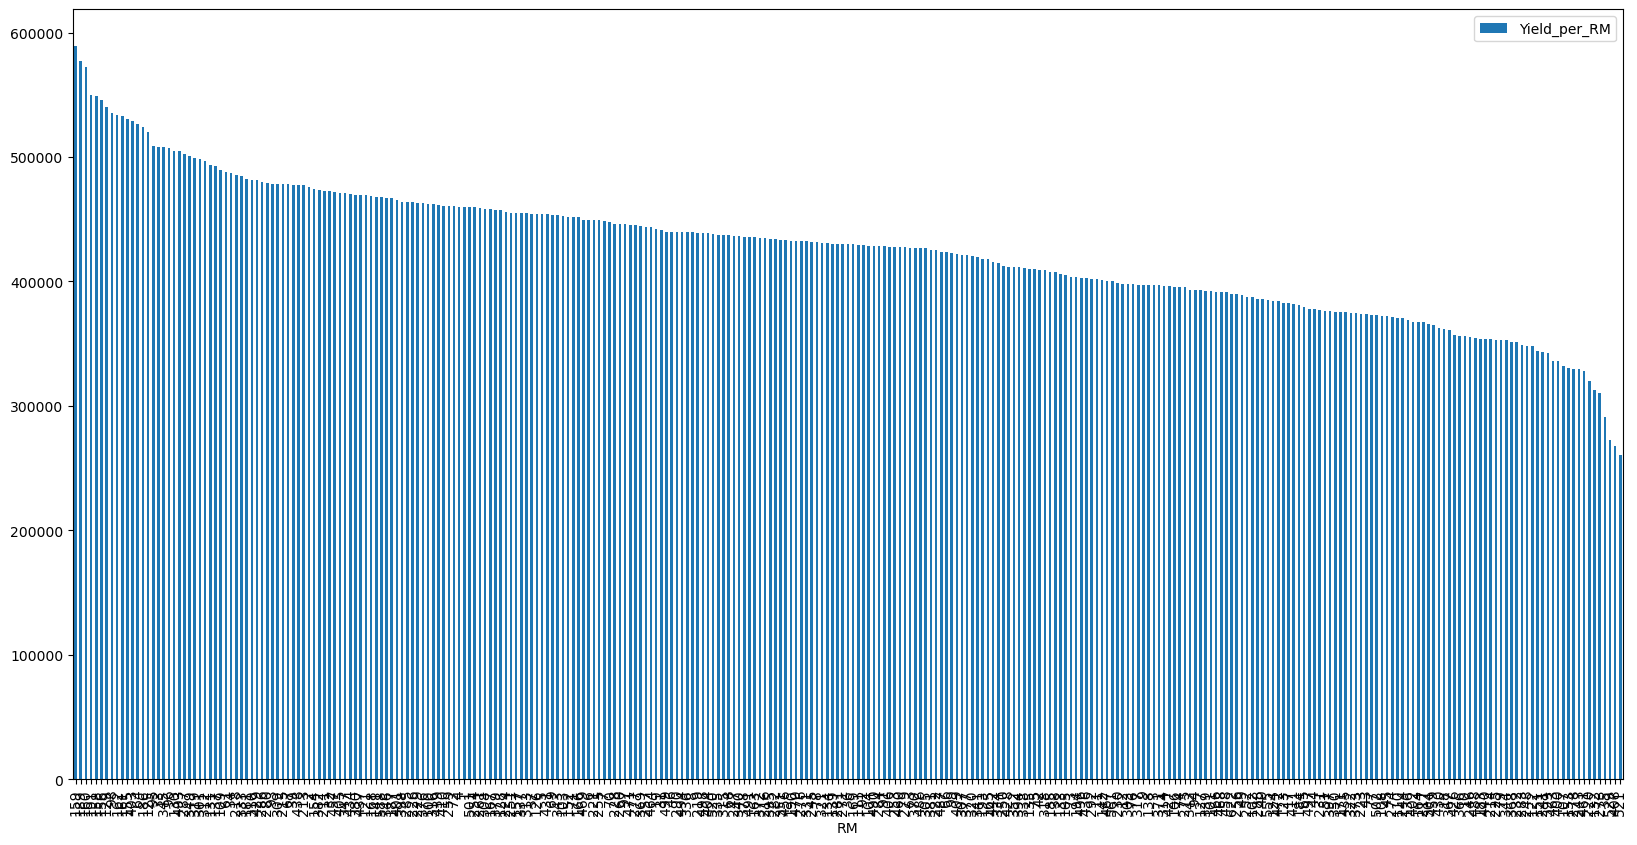

In [582]:
df_per_rm.plot(kind='bar', figsize=(20, 10)) # graph showing total yield per RM

In [583]:
df_new.groupby('Year')['RM'].count()\
    .to_frame()\
        .sort_values('RM') 
# checking if RM count per year is consistent. Based on below outcome, it is almost consistent so no major outliers.

,RM
Year,
2009,293
2021,295
2010,295
2011,295
2012,295
...,...
1962,299
1961,299
1960,299


In [584]:
df_new.groupby('RM')['Year'].count()\
    .to_frame()\
        .sort_values('Year') 
# checking if year count per RM is consistent. Based on below, first four rows (year count) are off from rest of the data

,Year
RM,
521,53
529,54
408,61
278,71
555,83
...,...
157,84
156,84
155,84


In [585]:
# Dropping RM with less Years
df_clean=df_new.loc[(df_new['RM']!=521) &
            (df_new['RM']!=529) &
            (df_new['RM']!=408) &
            (df_new['RM']!=278) ]

In [586]:
df_clean

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,42.945217,21.947115,4.00,758.895000,23.922286,1170.557895,1.00,902.666667,32.5,1.000000,27.195789,964.00000,0.0,1.268571,0.0,1408.240423
1,1939,1,42.945217,21.947115,9.00,758.895000,23.922286,1170.557895,16.00,902.666667,32.5,16.000000,27.195789,964.00000,0.0,1.268571,0.0,1408.240423
2,1940,1,42.945217,21.947115,12.00,758.895000,23.922286,1170.557895,23.00,902.666667,32.5,19.000000,27.195789,964.00000,0.0,1.268571,8.0,1408.240423
3,1941,1,42.945217,21.947115,18.00,758.895000,23.922286,1170.557895,32.00,902.666667,32.5,28.000000,27.195789,964.00000,0.0,1.268571,5.0,1408.240423
4,1942,1,42.945217,21.947115,20.00,758.895000,23.922286,1170.557895,35.00,902.666667,32.5,28.000000,14.000000,964.00000,0.0,1.268571,5.0,1408.240423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25012,2017,622,51.640000,43.060000,59.49,858.387749,14.600000,0.000000,93.01,1137.818882,43.6,38.157568,20.975000,965.60934,0.0,1.625385,5.0,1408.240423
25013,2018,622,51.640000,39.300000,59.50,858.387749,14.600000,0.000000,96.40,1137.818882,43.0,54.000000,20.975000,965.60934,0.0,1.625385,5.0,1408.240423
25014,2019,622,51.640000,46.100000,63.90,858.387749,14.600000,0.000000,106.00,1137.818882,33.7,73.900000,20.975000,965.60934,0.0,1.625385,5.0,1408.240423
25015,2020,622,51.640000,40.900000,55.10,858.387749,14.600000,0.000000,94.50,1137.818882,49.2,74.300000,20.975000,965.60934,0.0,1.625385,5.0,1408.240423


In [587]:
df_mean_wrt_rm = df_clean.groupby('RM').mean() # sum of yield per crop per RM
df_std_wrt_rm = df_clean.groupby('RM').std() # sum of yield per crop per RM

In [588]:
df_rm_mean

,Year,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
RM,,,,,,,,,,,,,,,,,
1,1979.500000,42.945217,21.947115,24.154096,758.895000,23.922286,1170.557895,45.644881,902.666667,32.500000,37.405301,27.195789,964.000000,0.000000,1.268571,12.383625,1408.240423
2,1979.500000,38.262500,23.679808,25.680120,814.634211,29.577333,1092.417647,46.792262,1107.429167,32.358621,37.755357,25.177432,972.158333,0.000000,1.328571,13.546098,1408.240423
3,1979.500000,43.066522,22.665962,25.430357,675.832143,30.494808,620.125000,45.807976,1009.404138,29.053333,39.307619,24.222436,1169.736190,6.666667,1.142667,13.026548,969.933333
4,1979.500000,37.411818,21.255208,22.984643,790.321111,27.032885,847.285714,40.397407,1251.575385,28.025926,32.747500,20.276349,933.662000,0.000000,1.228667,12.245181,1408.240423
5,1979.500000,33.166923,20.949767,21.416905,808.064000,27.102885,1035.714286,37.884000,1202.783500,30.044000,33.670988,17.413115,714.674444,0.000000,0.914000,11.493253,1408.240423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,1979.500000,35.000000,23.289245,28.410244,1300.000000,30.000000,514.500000,55.559870,934.000000,29.417857,41.022875,19.954545,767.200000,10.000000,1.209333,12.812500,1408.240423
555,1979.144578,37.947032,22.702791,23.986029,858.387749,28.864831,0.000000,49.635882,1137.818882,35.325000,33.863770,22.375000,965.609340,0.000000,1.394167,15.777778,1408.240423
561,1979.500000,37.947032,24.677200,27.799506,858.387749,11.000000,0.000000,53.278308,1265.000000,30.495833,40.843284,23.357143,965.609340,0.000000,1.738000,12.857143,1408.240423


In [589]:
df_std_wrt_rm

,Year,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
RM,,,,,,,,,,,,,,,,,
1,24.392622,5.423871,5.867428,10.588731,134.810789,4.043455,154.098932,21.913575,59.244778,4.842557,18.660155,11.844610,97.681558,0.000000,0.217138,6.879453,0.000000
2,24.392622,6.348196,5.491041,10.422367,85.686912,6.817099,166.131533,19.348181,153.242272,4.829990,16.472059,11.689641,75.429702,0.000000,0.239829,6.882477,0.000000
3,24.392622,5.104744,5.277796,9.954402,120.402551,7.005013,105.692260,16.922565,286.515993,4.157204,16.556543,8.938426,162.479400,1.792443,0.211087,6.088189,139.635538
4,24.392622,3.756115,5.580233,9.931620,84.206044,7.499238,118.275023,16.119073,177.291781,3.752769,13.126185,6.706637,98.626258,0.000000,0.275589,5.890745,0.000000
5,24.392622,4.594907,6.119119,9.583997,160.144621,7.451196,129.110555,15.933847,160.498708,3.760610,16.964198,5.826538,75.668719,0.000000,0.238210,6.162521,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,24.392622,0.000000,7.389104,10.571769,0.000000,1.969649,79.865889,24.425800,41.446438,6.223393,16.867123,4.131796,0.000000,2.688664,0.246969,3.332649,0.000000
555,24.321090,0.000000,7.725153,11.810299,0.000000,0.000000,0.000000,19.660422,0.000000,2.144953,13.037245,2.123834,0.000000,0.000000,0.213379,1.658517,0.000000
561,24.392622,0.000000,7.496756,12.986224,0.000000,0.000000,0.000000,18.228493,113.317977,6.971638,14.481636,2.268735,0.000000,0.000000,0.323353,0.910826,0.000000


In [590]:
df_mean_wrt_rm_total = df_mean_wrt_rm[0:].mean(axis=1).reset_index(name ='MeanYield').sort_values(by='MeanYield', ascending=False) # sum of all yields per RM
df_mean_wrt_rm_total.set_index('RM', inplace=True)
df_mean_wrt_rm_total # sum of all crop yield per RM

,MeanYield
RM,
159,529.144682
189,520.731157
160,517.300433
191,501.318000
158,500.997459
...,...
461,346.077554
220,340.552173
132,338.280860


In [591]:
df_std_wrt_rm_total = df_std_wrt_rm[0:].std(axis=1).reset_index(name ='StdYield').sort_values(by='StdYield', ascending=False) # sum of all yields per RM
df_std_wrt_rm_total.set_index('RM', inplace=True)
df_std_wrt_rm_total # sum of all crop yield per RM

,StdYield
RM,
257,120.327474
382,97.668669
155,92.752122
76,92.253322
17,90.685267
...,...
501,13.378302
334,11.255469
622,8.497309


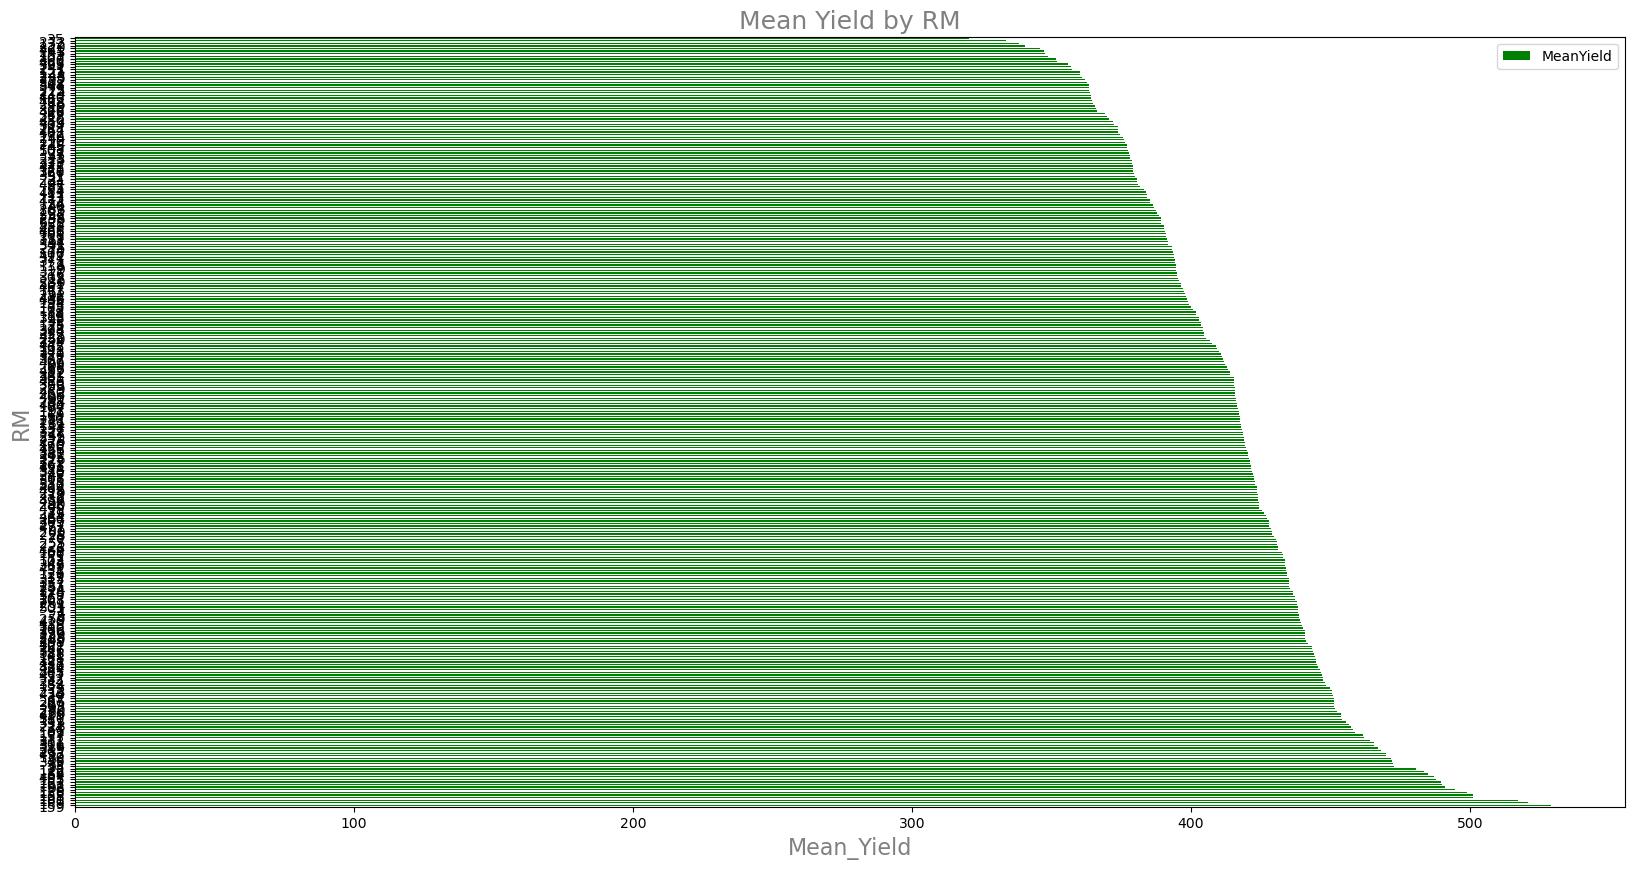

In [592]:
df_mean_wrt_rm_total.plot(
            kind='barh', 
            figsize=(20,10),
            color='green')
plt.title(
    'Mean Yield by RM', 
    size=18,
    color='gray')
plt.xlabel(
    'Mean_Yield',
    color='gray',
    size=16)
plt.ylabel(
    'RM',
    color='gray',
    size=16)
plt.legend()
plt.show()

# Cluster Yield Mean and Yield STD

In [593]:
df_ms=pd.merge(
    df_mean_wrt_rm_total,
    df_std_wrt_rm_total,
    on='RM'
)

In [594]:
df_ms

,MeanYield,StdYield
RM,,
159,529.144682,71.838739
189,520.731157,63.723432
160,517.300433,66.396186
191,501.318000,78.296919
158,500.997459,71.092310
...,...,...
461,346.077554,17.911937
220,340.552173,58.053379
132,338.280860,45.964657


# Unsupervised Machine Learning - K Means

C:\Users\faisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


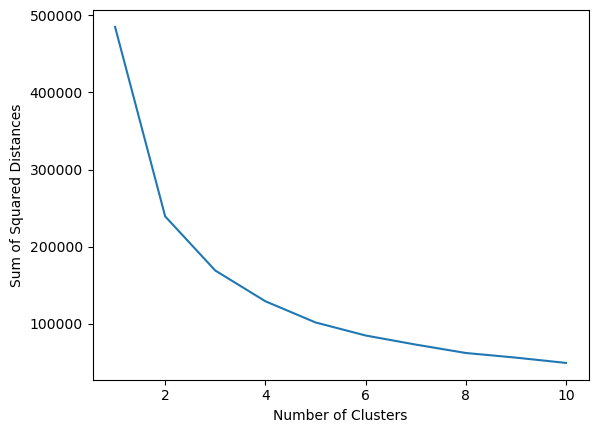

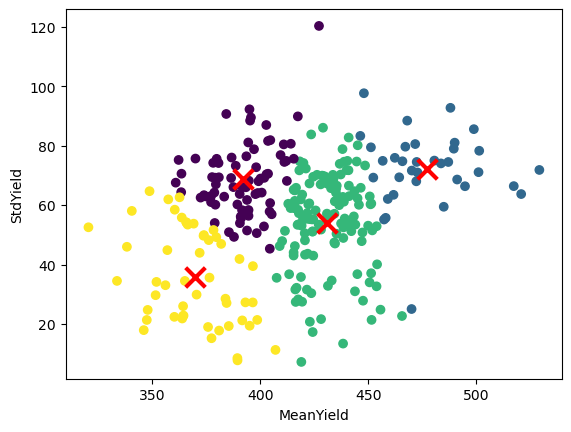

In [595]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df=df_ms.copy()

# Define the features to be used for clustering
X = df[['MeanYield', 'StdYield']]

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.predict(X)

# Plot the data points and cluster centers
plt.scatter(X['MeanYield'], X['StdYield'], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('MeanYield')
plt.ylabel('StdYield')
plt.show()

In [596]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

In [600]:
df_ms['Labels']=labels

df_ms

,MeanYield,StdYield,Labels
RM,,,
159,529.144682,71.838739,1
189,520.731157,63.723432,1
160,517.300433,66.396186,1
191,501.318000,78.296919,1
158,500.997459,71.092310,1
...,...,...,...
461,346.077554,17.911937,3
220,340.552173,58.053379,3
132,338.280860,45.964657,3


In [599]:
df_ms.groupby('Labels').mean()\
    .sort_values('MeanYield')

,MeanYield,StdYield
Labels,,
3,369.646550,35.743088
0,392.097402,68.673902
2,430.952936,54.120139
1,477.278727,72.216156


In [601]:
df_ms.replace(to_replace={
    3:3,
    0:2,
    2:1,
    1:0}, inplace=True
)

In [602]:
df_ms

,MeanYield,StdYield,Labels
RM,,,
159,529.144682,71.838739,0
189,520.731157,63.723432,0
160,517.300433,66.396186,0
191,501.318000,78.296919,0
158,500.997459,71.092310,0
...,...,...,...
461,346.077554,17.911937,3
220,340.552173,58.053379,3
132,338.280860,45.964657,3


In [610]:
gdf = gpd.read_file('D:/gis-data-science/Palette_training_5/Rural Municipality/Rural Municipality.shp')

#gdf = gpd.read_file('https://raw.githubusercontent.com/faisalapp/Palette_Training_5/main/Rural Municipality.zip!data/Rural Municipality.shp')




In [604]:
gdf.head()

,PPID,EFFDT,EXPDT,FEATURECD,RMNO,RMNM,SHAPE_AREA,SHAPE_LEN,geometry
0,0101000095,2019-01-21,NaN,RMPPID,095,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,0101000378,2019-07-29,NaN,RMPPID,378,ROSEMOUNT,5.844701e+08,161271.937167,"POLYGON ((265258.740 5810148.180, 266062.740 5..."
2,0101000288,2015-01-27,NaN,RMPPID,288,PLEASANT VALLEY,8.532007e+08,116895.097209,"POLYGON ((254141.490 5701256.420, 254179.510 5..."
3,0101000106,2019-04-24,NaN,RMPPID,106,WHISKA CREEK,8.526283e+08,129288.281136,"POLYGON ((339874.810 5539057.770, 339849.430 5..."
4,0101000132,2019-07-16,NaN,RMPPID,132,HILLSBOROUGH,6.343913e+08,103052.690196,"POLYGON ((445175.620 5573313.600, 445572.880 5..."


In [612]:
gdf['RMNO'] = gdf['RMNO'].str.lstrip('0')

In [613]:
gdf.head()

,PPID,EFFDT,EXPDT,FEATURECD,RMNO,RMNM,SHAPE_AREA,SHAPE_LEN,geometry
0,0101000095,2019-01-21,NaN,RMPPID,95,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,0101000378,2019-07-29,NaN,RMPPID,378,ROSEMOUNT,5.844701e+08,161271.937167,"POLYGON ((265258.740 5810148.180, 266062.740 5..."
2,0101000288,2015-01-27,NaN,RMPPID,288,PLEASANT VALLEY,8.532007e+08,116895.097209,"POLYGON ((254141.490 5701256.420, 254179.510 5..."
3,0101000106,2019-04-24,NaN,RMPPID,106,WHISKA CREEK,8.526283e+08,129288.281136,"POLYGON ((339874.810 5539057.770, 339849.430 5..."
4,0101000132,2019-07-16,NaN,RMPPID,132,HILLSBOROUGH,6.343913e+08,103052.690196,"POLYGON ((445175.620 5573313.600, 445572.880 5..."


In [617]:
gdf.rename(columns=
{
    'RMNO': 'RM',
}, inplace=True)


In [620]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PPID        298 non-null    object  
 1   EFFDT       298 non-null    object  
 2   EXPDT       0 non-null      float64 
 3   FEATURECD   298 non-null    object  
 4   RM          298 non-null    object  
 5   RMNM        298 non-null    object  
 6   SHAPE_AREA  298 non-null    float64 
 7   SHAPE_LEN   298 non-null    float64 
 8   geometry    298 non-null    geometry
dtypes: float64(3), geometry(1), object(5)
memory usage: 21.1+ KB
